In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
from defs_2024_05_11 import *

Splikes version  0.1.4
Plasticnet version  0.1.12
macOS-14.5-arm64-arm-64bit
Base Image File: asdf/bbsk081604_all_scale2.asdf


In [ ]:
import matplotlib
matplotlib.get_cachedir()

'/Users/bblais/.matplotlib'

In [ ]:
weak_i=0
strong_i=1

In [ ]:
base_sim_dir="sims-2024-06-03b"
print(base_sim_dir)

loadvars(f'{base_sim_dir}/glasses_results.asdf')
loadvars(f'{base_sim_dir}/patch_results.asdf')
loadvars(f'{base_sim_dir}/atropine_results.asdf')
loadvars(f'{base_sim_dir}/contrast_results.asdf')
loadvars(f'{base_sim_dir}/mask_results.asdf')

sims-2024-06-03b
Found ['glasses_result']
Found ['patch_result']
Found ['atropine_result']
Found ['contrast_result']
Found ['mask_result']


0.11277910299756272 0.14417388191347946


Text(0.5, 0, 'Open-Eye Noise Level')

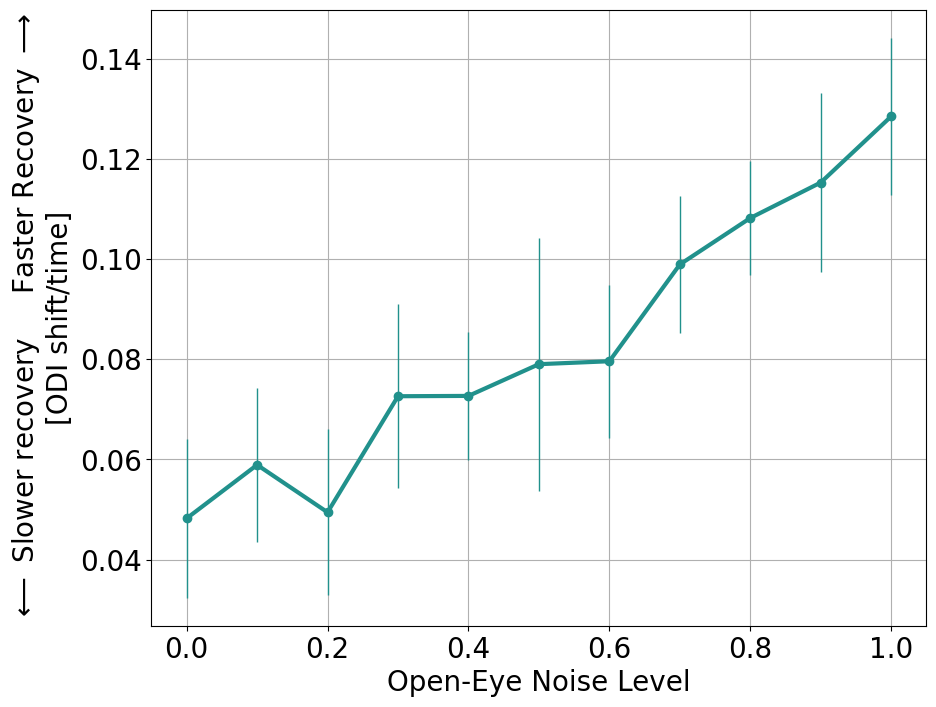

In [ ]:
import cycler
colormap=cm.viridis

n = 5
#colormap=cm.Blues
#color = colormap(np.linspace(1, 0,int(1.2*n)))

colormap=cm.viridis
color = colormap(np.linspace(0, 1,n))

glasses_plot_color=cm.viridis(np.linspace(0, 1,5))[2]

noise,recovery_rate_μ,recovery_rate_σ=glasses_result        

glasses_μ=-recovery_rate_μ
glasses_σ=2*recovery_rate_σ

# best case
idx=argmax(glasses_μ)
max_glasses=glasses_μ[idx]+glasses_σ[idx]
min_glasses=glasses_μ[idx]-glasses_σ[idx]
print(min_glasses,max_glasses)


errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,fmt='o-',color=color[2]) # positive = recovery
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Open-Eye Noise Level')
#title('Patch Treatment')

# sfname=f"{savepath}/glasses_treatment.pdf"
# print(sfname)
# savefig(sfname,bbox_inches="tight")


0.16110690754038048 0.24694391750165923


Text(0.5, 0, 'Closed-Eye Noise Level')

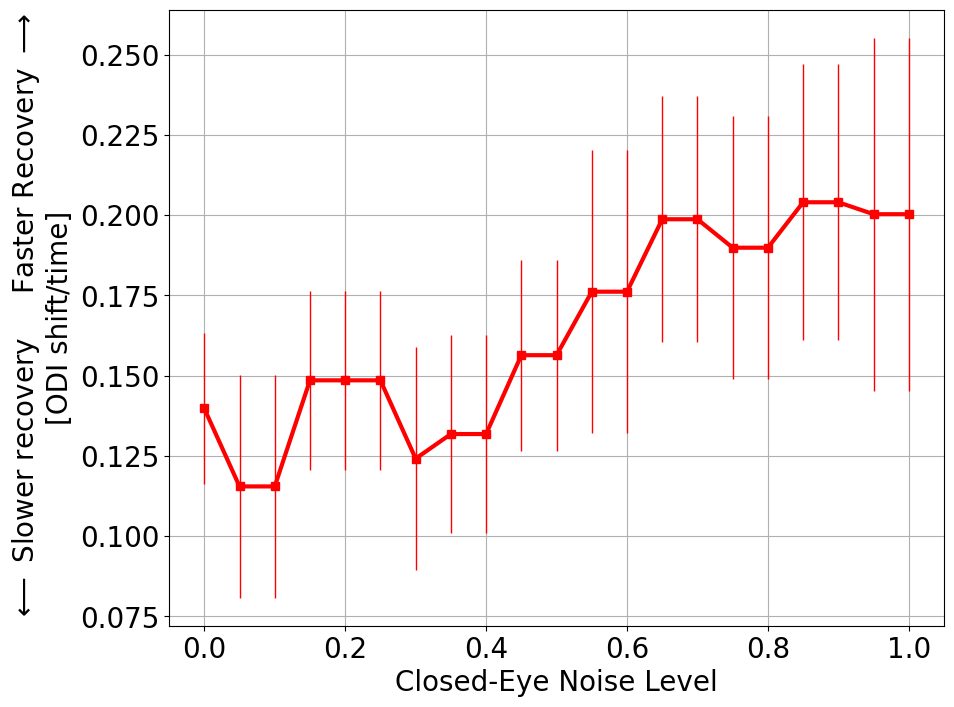

In [ ]:
import cycler
colormap=cm.viridis

n = 5
#colormap=cm.Blues
#color = colormap(np.linspace(1, 0,int(1.2*n)))

colormap=cm.viridis
color = colormap(np.linspace(0, 1,n))


noise,recovery_rate_μ,recovery_rate_σ=patch_result        

patch_μ=-recovery_rate_μ
patch_σ=2*recovery_rate_σ

# best case
idx=argmax(patch_μ)
max_patch=patch_μ[idx]+patch_σ[idx]
min_patch=patch_μ[idx]-patch_σ[idx]
print(min_patch,max_patch)


errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,fmt='rs-') # positive = recovery
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Closed-Eye Noise Level')
#title('Patch Treatment')

# sfname=f"{savepath}/patch_treatment.pdf"
# print(sfname)
# savefig(sfname,bbox_inches="tight")


<matplotlib.legend.Legend>

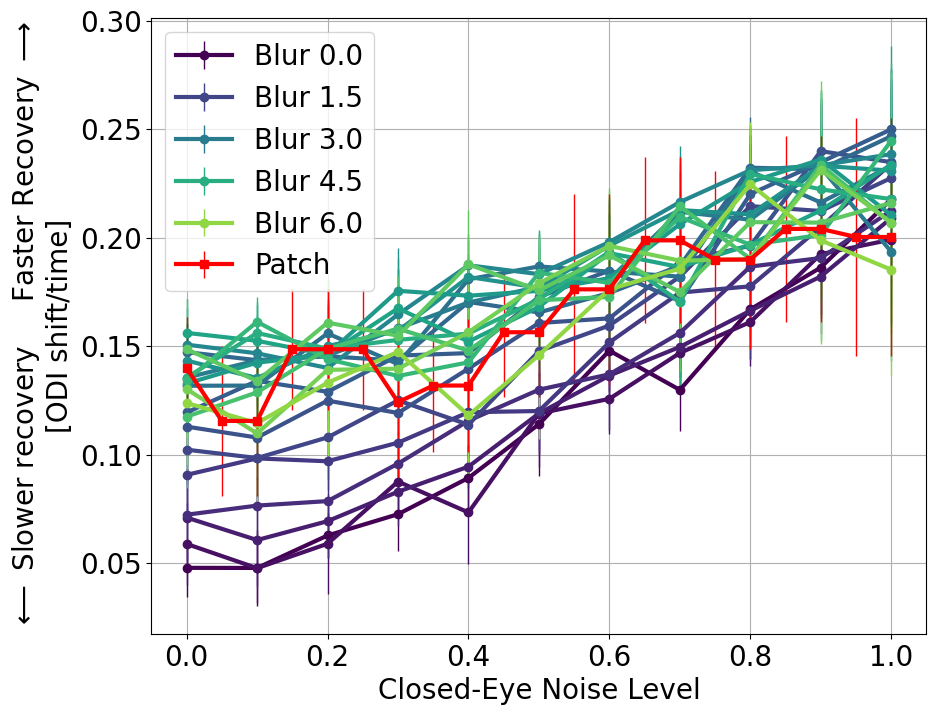

In [ ]:
import cycler
colormap=cm.viridis
n = 25
#color = colormap(np.linspace(1, 0,int(1.2*n)))
color = colormap(np.linspace(0, 1,n))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)



noise,blur,recovery_rate_μ,recovery_rate_σ=atropine_result
blur_N=blur.shape[1]
for b in range(blur_N):
    
    if blur[0,b] in [0,1.5,3,4.5,6]:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 label=f'Blur {blur[0,b]}',fmt='o-',color=color[b]) # positive = recovery
    else:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 color=color[b],fmt='o-') # positive = recovery
        
        
noise,recovery_rate_μ,recovery_rate_σ=patch_result        
errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color='r',fmt='s-',label='Patch') # positive = recovery
        
        
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Closed-Eye Noise Level')
#title('Atropine Treatment')
    
legend()
# sfname=f"{savepath}/atropine_treatment.pdf"
# print(sfname)
# savefig(sfname,bbox_inches="tight")


In [ ]:
blur[0,:]

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. , 3.3, 3.6,
       3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ])

<matplotlib.legend.Legend>

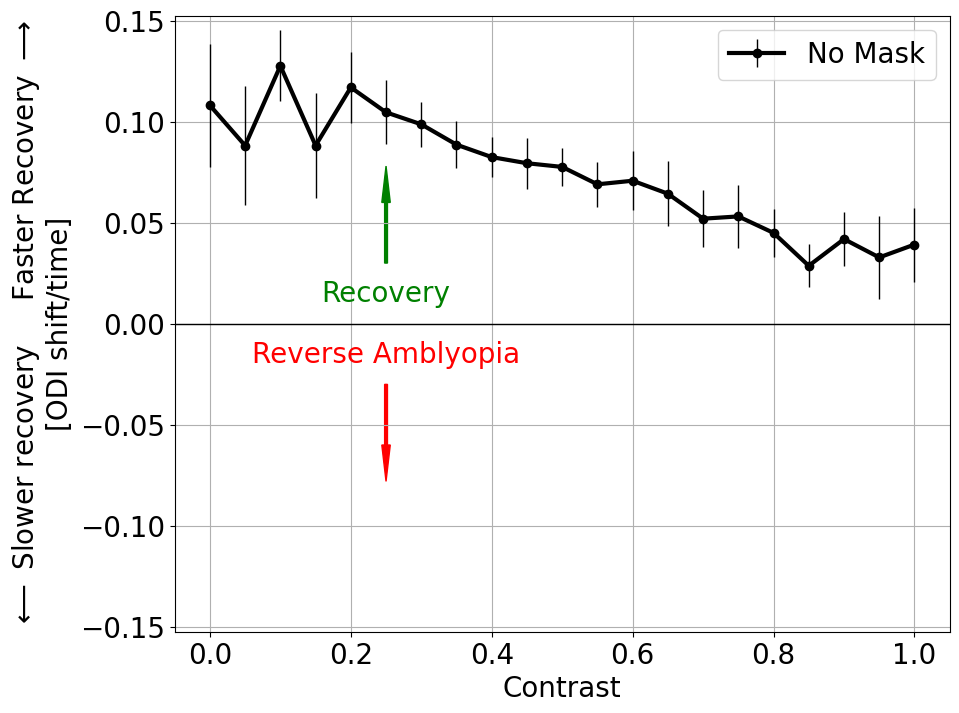

In [ ]:
contrast,recovery_rate_μ,recovery_rate_σ=contrast_result
errorbar(contrast,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,fmt='o-',color='k',label='No Mask') # positive = recovery

    
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

xlabel('Contrast')
#title('Contrast+Mask Treatment')
    
xl=gca().get_xlim()
plot(xl,[0,0],'k-',lw=1)
gca().set_xlim(xl)

yl=array(gca().get_ylim())
mx=max(abs(yl))
yl=[-mx,mx]
gca().set_ylim(yl)
    
text(0.25,0.015,'Recovery',ha='center',va='center',color='green')
text(0.25,-0.015,'Reverse Amblyopia',ha='center',va='center',color='red')
arrow(.25,-.03,0,-.03,width=0.004,color='red')
arrow(.25,.03,0,.03,width=0.004,color='green')
legend()

<matplotlib.legend.Legend>

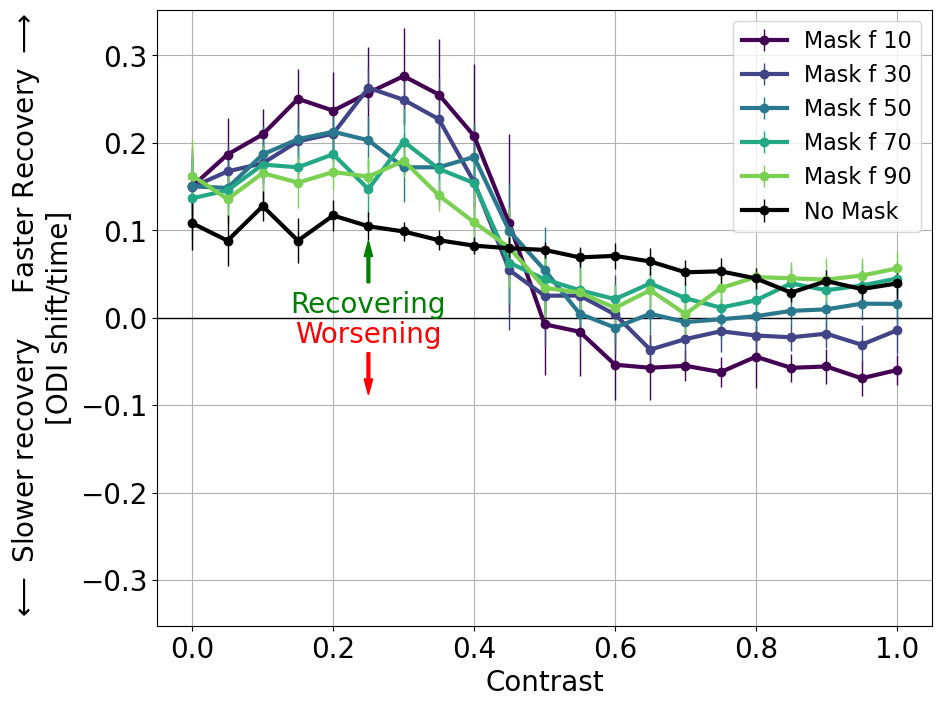

In [ ]:
import cycler
f_mat=array([10,30,50,70,90])
f_N=len(f_mat)


n = len(f_mat)+1
#colormap=cm.Blues
#color = colormap(np.linspace(1, 0,int(1.2*n)))
colormap=cm.viridis
color = colormap(np.linspace(0, 1,int(n)))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

f,contrast,recovery_rate_μ,recovery_rate_σ=mask_result
for fi in range(f_N):
    
    errorbar(contrast[fi,:],-recovery_rate_μ[fi,:],yerr=2*recovery_rate_σ[fi,:],elinewidth=1,
             label=f'Mask f {f[fi,0]}',color=color[fi],fmt='o-') # positive = recovery

    
    
contrast,recovery_rate_μ,recovery_rate_σ=contrast_result
errorbar(contrast,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,fmt='o-',color='k',label='No Mask') # positive = recovery

    
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

xlabel('Contrast')
#title('Contrast+Mask Treatment')
    
xl=gca().get_xlim()
plot(xl,[0,0],'k-',lw=1)
gca().set_xlim(xl)
    
yl=array(gca().get_ylim())
mx=max(abs(yl))
yl=[-mx,mx]
gca().set_ylim(yl)


text(0.25,0.015,'Recovering',ha='center',va='center',color='green')
text(0.25,-0.02,'Worsening',ha='center',va='center',color='red')
arrow(.25,-.04,0,-.03,width=0.004,color='red')
arrow(.25,.04,0,.03,width=0.004,color='green')
legend(fontsize=16)

# sfname=f"{savepath}/contrast_mask_treatment.pdf"
# print(sfname)
# savefig(sfname,bbox_inches="tight")


<matplotlib.legend.Legend>

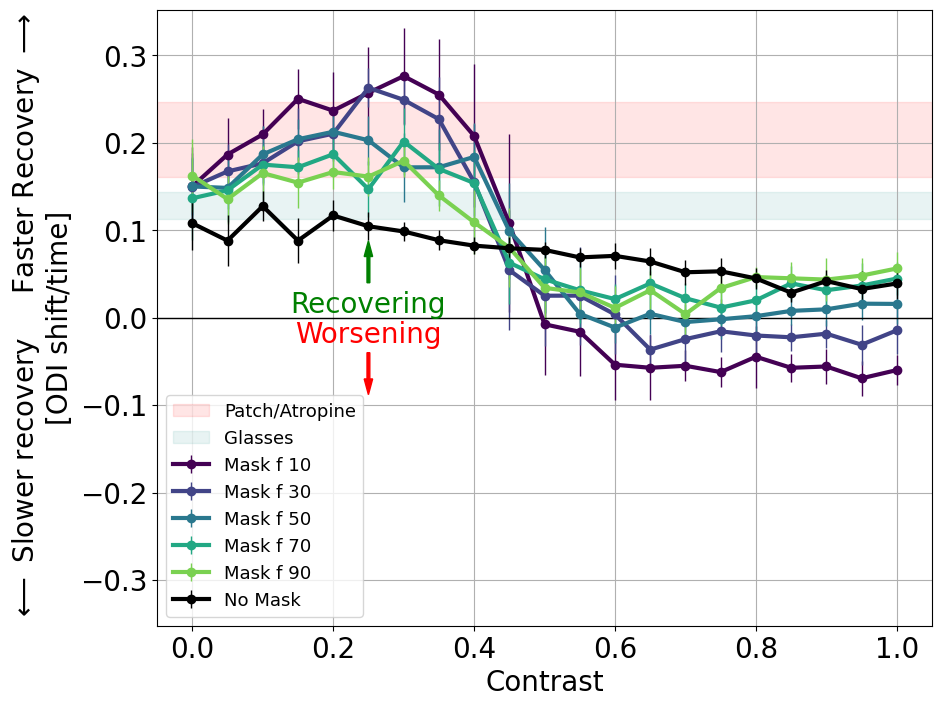

In [ ]:
import cycler
f_mat=array([10,30,50,70,90])
f_N=len(f_mat)


n = len(f_mat)+1
#colormap=cm.Blues
#color = colormap(np.linspace(1, 0,int(1.2*n)))
colormap=cm.viridis
color = colormap(np.linspace(0, 1,int(n)))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

f,contrast,recovery_rate_μ,recovery_rate_σ=mask_result
for fi in range(f_N):
    
    errorbar(contrast[fi,:],-recovery_rate_μ[fi,:],yerr=2*recovery_rate_σ[fi,:],elinewidth=1,
             label=f'Mask f {f[fi,0]}',color=color[fi],fmt='o-') # positive = recovery

    
    
contrast,recovery_rate_μ,recovery_rate_σ=contrast_result
errorbar(contrast,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,fmt='o-',color='k',label='No Mask') # positive = recovery

    
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

xlabel('Contrast')
#title('Contrast+Mask Treatment')
    
xl=gca().get_xlim()
plot(xl,[0,0],'k-',lw=1)
gca().set_xlim(xl)
    
yl=array(gca().get_ylim())
mx=max(abs(yl))
yl=[-mx,mx]
gca().set_ylim(yl)


text(0.25,0.015,'Recovering',ha='center',va='center',color='green')
text(0.25,-0.02,'Worsening',ha='center',va='center',color='red')
arrow(.25,-.04,0,-.03,width=0.004,color='red')
arrow(.25,.04,0,.03,width=0.004,color='green')

axhspan(min_patch,max_patch, color='red', alpha=0.1,label='Patch/Atropine')

glasses_plot_color=cm.viridis(np.linspace(0, 1,5))[2]
axhspan(min_glasses,max_glasses, color=glasses_plot_color, alpha=0.1,label='Glasses')

legend(fontsize=13)


# sfname=f"{savepath}/contrast_mask_treatment.pdf"
# print(sfname)
# savefig(sfname,bbox_inches="tight")
